# Введение

Музыка — это универсальный язык, который понимают миллионы людей по всему миру.


В этом проекте я применю методы машинного обучения к одной из интереснейших и полезных областей — музыкальной теории, а именно классификации наклонения музыкальных аккордов.  

Для того чтобы описать набор данных, пройдемся немного по музыкальной теории.


Ещё со школы вам может быть известен такой элемент музыкальной теории, как **нота**. Это некоторое обозначение звука определенной высоты. Высота звука с точки зрения физики зависит от частоты (герцовки) данного звука.

Обычно ноты обозначают достаточно распространенной системой - буквенная нотация.

---
С (до) - D (ре) - E (ми) - F (фа) - G (соль) - A (ля) - B (си)





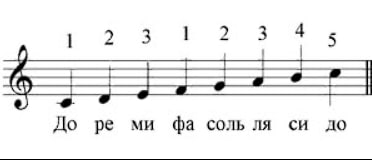

На картинке выше показано изображение нот на нотном стане



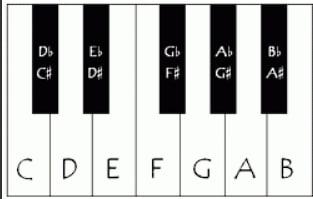

На картинке выше показано положение нот на клавишах пианино. Как видите, помимо обычных описанных нот C-D-E-F-G-A-B, существуют ещё и непонятные # и b, которые расположены на черных клавишах. Это диезы и бемоли. По существу, они говорят о сдвиге ноты на полутон вперед или назад. Диез говорит о сдвиге на полутон вперед, а бемоль - назад. Например C# (До диез) - это нота C, которая сдвинута на полутон вперед. Эту же ноту можно назвать Db (Ре бемоль) - нота D, которая сдвинута на полутон назад.

Что же такое тон и полутон? Это условное обозначение интервала (реже расстояния) между нотами. Полутон - наименьшее расстояние между двумя ближайшими по высоте звучания нотами. Тон - 2 полутона. На примере клавиш, представленных на рисунке выше:

расстояние между нотами C (До) и E (ми) = 4 полутона или 2 тона.

расстояние между нотами C (До) и B (си) = 11 полутонов или 5.5 тонов.

расстояние между нотами E (ми) и F (фа) = 1 полутон или 0.5 тона.

Человек, который видел в своей жизни клавишные инструменты (пианино, фортепиано и т.д) скажет:

> Но ведь на них больше чем 12 клавиш. Значит нот больше, чем 12?

Нет. После того, как от исходной ноты мы отступаем ровно 12 полутонов, мы переходим на октаву выше. Октава - интервал между ближайшими одноимёнными звуками различной высоты, или интервал в 12 полутонов.


После крайней ноты B (си) - ноты начинают повторятся, но уже с другой частотой. Вы будете слышать одни и те же ноты, но с более высокой частотой.

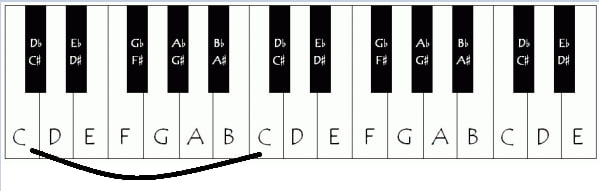

---
Как можно определить частоту нот?

На сегодняшний день, стандартом звукоряда является "равномерно темперированный строй". В нём, ноты всех аккордов образуются от ноты A (ля)

Равномерно темперированный строй —  музыкальный строй, в котором каждая октава делится на математически равные интервалы, в наиболее типичном случае — на двенадцать полутонов, каждый из которых равен $\sqrt[12]{2}$. Грубо говоря, распределение частот образует геометрическую прогрессию.

Значение частоты ноты "ля" в так называемой "первой октаве" (четвёртой по стандарту MIDI) равна 440 герц.

Можно математически вычислить частоты для всего звукоряда, пользуясь формулой:

$f(i)=f_0*2^{\frac{i}{12}}$ , где $f_0$ - частота камертона(исходной ноты, например A (ля) = 440 Гц), а i - количество полутонов в интервале от исследуемого звука к эталону




Перед тем как приступить к вычислениям, нужно сказать 3 важных факта:

*   В качестве опорной ноты можно и нужно использовать ноту A (ля) с частотой 440 Гц.
*   Если вы удвоите частоту ноты, вы снова получите ту же ноту на одну октаву выше.
*   В логарифмическом масштабе все интервалы между последовательными нотами равны.

Человек номинально слышит звуки в диапазоне от 16 до 20000 Гц. Будем умножать частоту эталонной ноты A (ля) = 440 Гц на $\frac{1}{2}$, до тех пор, пока не получим значение близкое к 16.

440 - 220 - 110 - 55 - 27.5

Получили частоту - 27.5 . Это та же нота A (ля), только на 4 октавы ниже



In [123]:
import pandas as pd
import numpy as np

freq_0 = 27.5
freq = []

for i in range(108):
    freq.append(freq_0)
    freq_0 *= 2**(1/12)


freq = np.reshape(np.round(freq,2), (9, 12))
cols = ["A", "A#", "B", "C", "C#", "D", "D#", "E", "F", "F#", "G", "G#"]
df_note_freqs = pd.DataFrame(freq, columns=cols)
print("Частоты нот (Гц)")
df_note_freqs.head(10)

Частоты нот (Гц)


,A,A#,B,C,C#,D,D#,E,F,F#,G,G#
0,27.5,29.14,30.87,32.70,34.65,36.71,38.89,41.20,43.65,46.25,49.00,51.91
1,55.0,58.27,61.74,65.41,69.30,73.42,77.78,82.41,87.31,92.50,98.00,103.83
2,110.0,116.54,123.47,130.81,138.59,146.83,155.56,164.81,174.61,185.00,196.00,207.65
3,220.0,233.08,246.94,261.63,277.18,293.66,311.13,329.63,349.23,369.99,392.00,415.30
4,440.0,466.16,493.88,523.25,554.37,587.33,622.25,659.26,698.46,739.99,783.99,830.61
5,880.0,932.33,987.77,1046.50,1108.73,1174.66,1244.51,1318.51,1396.91,1479.98,1567.98,1661.22
6,1760.0,1864.66,1975.53,2093.00,2217.46,2349.32,2489.02,2637.02,2793.83,2959.96,3135.96,3322.44
7,3520.0,3729.31,3951.07,4186.01,4434.92,4698.64,4978.03,5274.04,5587.65,5919.91,6271.93,6644.88
8,7040.0,7458.62,7902.13,8372.02,8869.84,9397.27,9956.06,10548.08,11175.30,11839.82,12543.85,13289.75


Играя ноты в последовательности (вообще говоря в любой) - вы получаете мелодию. Играя 3 и более ноты одновременно - вы получаете набор интервалов - аккорд.

Помимо рутовой (основной) ноты, т.е ноты, которая задает тон (тоника), аккорды отличаются своим наклонением. Оно бывает мажорным и минорным.

По эмоциональной окраске: мажорный аккорд - весёлый(солнце), минорный - грустный(тучи)


**Построение мажорного аккорда:**

1.   Первая нота: Выбираем корневую ноту (тонику)
2.   Вторая нота: Перемещаемся на 2 тона от тоники
3.   Третья нота: Перемещаемся на 1.5 тона от второй ноты



Попробуем составить мажорный аккорд, корневая нота которого - C (До). Перемещаемся на 2 тона - вторая нота - «E».

Перемещаемся от второй ноты на 1.5 тона - третья нота - «G».

Получили трезвучие из нот C (до), E (ми), G (Соль), т.е аккорд - До мажор (C).

Формирование минорного аккорда также аналогично, разница заключается лишь в нескольких отступах.
**Построение минорного аккорда:**

1.   Первая нота: Выбираем корневую ноту (тонику)
2.   Вторая нота: Перемещаемся на 1.5 тона от тоники
3.   Третья нота: Перемещаемся на 2 тона от второй ноты

Попробуем составить минорный аккорд, корневая нота которого - C (До). Перемещаемся на 1.5 тона - вторая нота - «D# или Eb».

Перемещаемся от второй ноты на 2 тона - третья нота - "G"

Получили трезвучие из нот C (До), D# или Eb (До диез или Ми бемоль), G (Соль), т.е аккорд - До минор (Cm)

# Описание набора данных

Набор данных содержит записи различных мажорных и минорных аккордов, сыгранных на гитаре и пианино. Формат звуковых файлов - wav. В архиве majmin_data есть папка Audio_Files, которая разделена ещё на две папки: Minor и Major.

В папке Minor - записи сыгранных на пианино и гитаре минорных аккордов.

В папке Major - записы сыгранных на пианино и гитаре мажорных аккордов.

In [124]:
!unzip majmin_data.zip

Archive:  majmin_data.zip
replace Audio_Files/Major/Major_0.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Послушайте звучание двух аккордов различной окраски. Действительно, мажор звучит веселее минора.

In [125]:
import IPython

chord_1_maj = "/content/Audio_Files/Major/Major_0.wav"

chord_1_min = "/content/Audio_Files/Minor/Minor_0.wav"

print("Аккорд C (До) мажор")
IPython.display.Audio(chord_1_maj, rate = 44100)

Аккорд C (До) мажор


In [126]:
print("Аккорд C (До) минор")
IPython.display.Audio(chord_1_min, rate = 44100)

Аккорд C (До) минор


Все конечно хорошо, но как вообще работать с аудиофайлами, чтобы решить нашу задачу?


# Представление набора данных

Как я уже сказал раннее, каждую ноту описывает своя частота. Но в природе, музыкальные ноты никогда не создают колебания только на определенной частоте. Когда мы играем ноту на инструменте, гармоники ноты возникают на целых кратных частотах базовой ноты. При воспроизведении ноты «А» с частотой 220 Гц также возникают волны с частотой 440 Гц, 660 Гц, 880 Гц, 1100 Гц и так далее. Мы знаем, что 220 Гц, 440 Гц и 880 Гц - это все ноты «А». Но если посмотреть на таблицу, которую я вывел раннее, то 660 Гц - это нота E (Ми), а 1000 Гц находится где-то между C (До) и C# (До диез).

Для того, чтобы как-то ловить эти частоты, мы можем дискретизировать звуковой сигнал. Для этого существует алгоритм дискретного преобразования Фурье. Давайте построим графики непрерывного сигнала (сигнал во временной области) и дискретного (сигнал в частотной области).

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import wavfile
from scipy.fft import fft, fftfreq
from scipy.signal import spectrogram, find_peaks

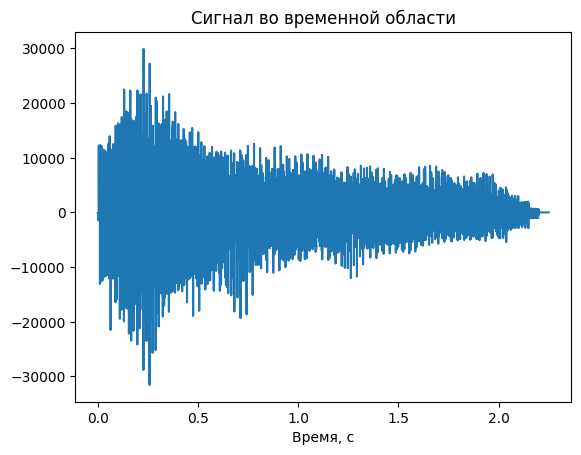

In [128]:
path = "/content/Audio_Files/Major/Major_0.wav"
fs, signal = wavfile.read(path)
N = len(signal)
time = np.linspace(0., N/fs, N)


y_freq = fftfreq(N, 1/fs)[:N//2]
signal_f = fft(signal)
signal_abs = 2.0/N * np.abs(signal_f[0:N//2])


plt.plot(time, signal)
plt.title("Сигнал во временной области")
plt.xlabel('Время, с')
plt.show()


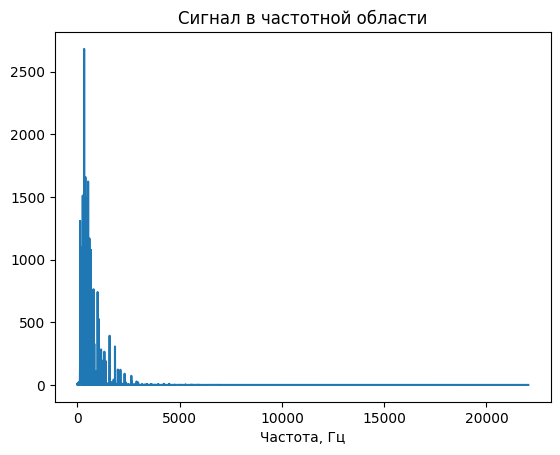

In [129]:
plt.plot(y_freq, signal_f_onesided)
plt.title("Сигнал в частотной области")
plt.xlabel('Частота, Гц')
plt.show()

Приблизим графики

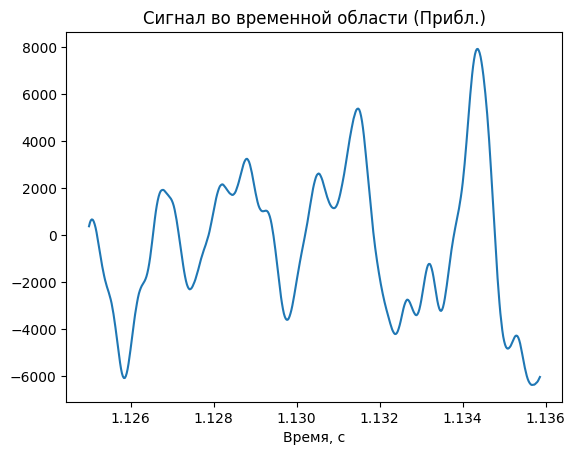

In [130]:
plt.plot(time[(N//2):(N//2+480)], signal[(N//2):(N//2+480)])
plt.title("Сигнал во временной области (Прибл.)")
plt.xlabel('Время, с')
plt.show()

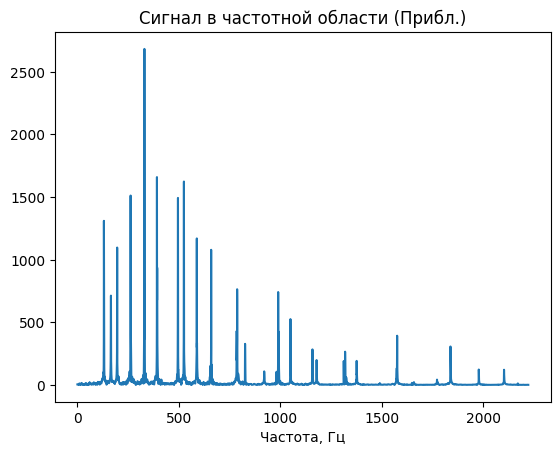

In [131]:
plt.plot(y_freq[:5000], signal_f_onesided[:5000])
plt.title("Сигнал в частотной области (Прибл.)")
plt.xlabel('Частота, Гц')
fig.tight_layout()
plt.show()

Как видно, распределение сигнала не подчиняется никакому закону. Интервалы между гармониями различаются. Оно и правильно, как я уже сказал раннее, в природе ноты не производят колебания на одинаковой частоте. Как раз таки на этом мы и будем строить классификатор, т.е мы будем брать взаимосвязи гармоник всех образцов.

Кстати, можно было бы и пользоваться спектрограммами (матрица распределения частот во времени), но так как аккорд в аудиофайлах один, и он не меняется со временем, то считаю, что нет смысла использовать спектрограмму.


Давайте определим пики гармоник в прочитанном аудиофайле

Пики гармоник: [ 131.  165.  196.  262.  330.  392.  496.  525.  588.  659.  787.  826.
  989. 1050. 1158. 1179. 1312. 1319. 1376. 1576. 1838.]


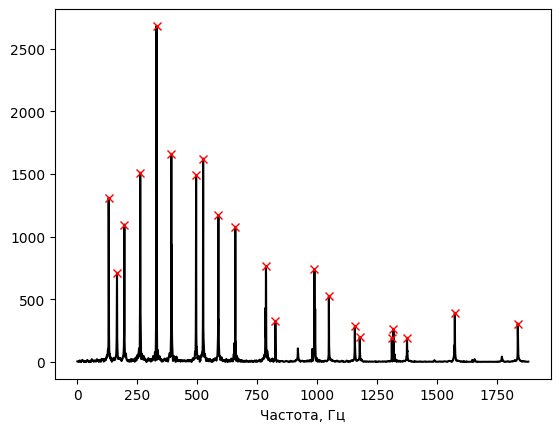

In [132]:
threshold = signal_abs.max()*5/100
peaks, _ = find_peaks(signal_abs, distance=10, height = threshold)

base_50 = np.abs(y_freq - 50).argmin()
peaks = peaks[peaks>base_50]
harmonics = y_freq[peaks]
print("Пики гармоник: {}".format(np.round(harmonics)))


i = peaks.max() + 100
plt.plot(y_freq[:i], signal_abs[:i], color = 'black')
plt.plot(y_freq[peaks], signal_abs[peaks], "x", color = 'red')
plt.xlabel('Частота, Гц')
plt.show()

В дальнейшем, для каждого файла будем делать похожие вещи. Поэтому есть смысл создать готовую функцию.

In [133]:
def find_harmonics(path, print_peaks=False):
    fs, X = wavfile.read(path)
    N = len(X)
    X_F = fft(X)
    X_F_abs = 2.0/N * np.abs(X_F[0:N//2])
    freqs = fftfreq(N, 1/fs)[:N//2]
    base_50 = np.abs(freqs - 50).argmin()

    h = X_F_abs.max()*5/100
    peaks, _ = find_peaks(X_F_abs, distance=10, height = h)
    peaks = peaks[peaks>base_50]
    harmonics = np.round(freqs[peaks])

    if print_peaks:
        i = peaks.max() + 100
        plt.plot(freqs[:i], X_F_abs[:i], color = 'black')
        plt.plot(freqs[peaks], X_F_abs[peaks], "x", color = 'red')
        plt.xlabel('Частота, Гц')
        plt.show()
    return harmonics

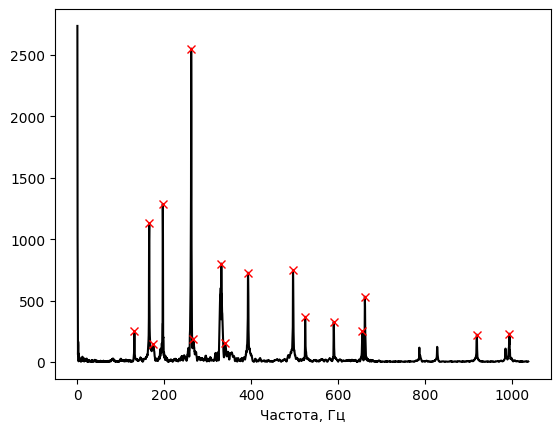

array([131., 165., 175., 196., 262., 267., 331., 340., 392., 496., 524.,
       590., 656., 661., 919., 993.])

In [134]:
path_example = "/content/Audio_Files/Major/Major_1.wav"

find_harmonics(path_example, print_peaks=True)

# Подготовка значений

In [135]:
import os

path = "/content/Audio_Files"
data = []

for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        foldername = os.path.basename(dirname)
        full_path = os.path.join(dirname, filename)
        freq_peaks = find_harmonics(full_path)

        cur_data = [foldername, filename, freq_peaks.min(), freq_peaks.max(), len(freq_peaks)]
        cur_data.extend(freq_peaks)

        data.append(cur_data)
max_harm_length = max(len(row[5:]) for row in data)
cols = ["Chord Type", "File Name", "Min Harmonic", "Max Harmonic", "i of Harmonics"] + \
       ["Harmonic {}".format(i+1) for i in range(max_harm_length)]
df = pd.DataFrame(data, columns=cols)
df

,Chord Type,File Name,Min Harmonic,Max Harmonic,i of Harmonics,Harmonic 1,Harmonic 2,Harmonic 3,Harmonic 4,Harmonic 5,...,Harmonic 29,Harmonic 30,Harmonic 31,Harmonic 32,Harmonic 33,Harmonic 34,Harmonic 35,Harmonic 36,Harmonic 37,Harmonic 38
0,Minor,Minor_104.wav,88.0,1874.0,27,88.0,131.0,175.0,209.0,262.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Minor,Minor_201.wav,175.0,1053.0,13,175.0,233.0,278.0,350.0,354.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Minor,Minor_117.wav,87.0,919.0,21,87.0,131.0,156.0,173.0,208.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Minor,Minor_145.wav,98.0,877.0,12,98.0,175.0,196.0,233.0,295.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Minor,Minor_276.wav,155.0,2225.0,25,155.0,234.0,278.0,311.0,370.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854,Major,Major_184.wav,93.0,1838.0,31,93.0,117.0,165.0,186.0,208.0,...,1463.0,1576.0,1838.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
855,Major,Major_308.wav,124.0,2595.0,25,124.0,185.0,248.0,312.0,364.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
856,Major,Major_356.wav,83.0,1978.0,38,83.0,117.0,147.0,165.0,209.0,...,1043.0,1050.0,1177.0,1253.0,1313.0,1319.0,1463.0,1575.0,1838.0,1978.0
857,Major,Major_325.wav,156.0,1327.0,23,156.0,220.0,247.0,264.0,272.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Мы получили достаточно неплохой приведенный набор данных.

**"Chord Type"** - значение которое мы будем предсказывать (Мажор или Минор)

**"File Name"** - имя файла

**"Min Harmonic, Max Harmonic"** - Минимальная гармоника и максимальная гармоника из найденных пиков.

**"i of harmonics"** - количество найденных пиков

**"$H_i$"** - значения пика на i-ой гармонике


Как видно, не у всех образцов прослеживаются максимальное количество гармоник (в выборке). Хочется узнать количество значений, которые не попали в i-ую гармонику.

In [136]:
miss_values = df.isnull().sum().sort_values(ascending=False)
miss_values[miss_values>0]

Harmonic 38    858
Harmonic 37    857
Harmonic 36    855
Harmonic 35    847
Harmonic 34    839
Harmonic 33    829
Harmonic 32    813
Harmonic 31    793
Harmonic 30    773
Harmonic 29    754
Harmonic 28    720
Harmonic 27    682
Harmonic 26    656
Harmonic 25    611
Harmonic 24    551
Harmonic 23    501
Harmonic 22    471
Harmonic 21    438
Harmonic 20    406
Harmonic 19    382
Harmonic 18    345
Harmonic 17    306
Harmonic 16    241
Harmonic 15    191
Harmonic 14    150
Harmonic 13    108
Harmonic 12     74
Harmonic 11     46
Harmonic 10     20
Harmonic 9      10
dtype: int64

Видно, что 8 пиков гармоник имеет каждый образец выборки. Они являются самыми важными. А что с остальными? Для остальных гармоник мы проведем интервальный анализ.



Произведем оценку плотности. График распределения вторых гармоник показываем, что нет прямой связи между вторыми гармониками и оттенком аккорда. Но, мы знаем, что разница между мажором и минором возникает из-за интервалов. А частота нот увеличивается по логарифмической шкале. Если я поделю вторую гармонику на первую, то смогу получить первый интервал.

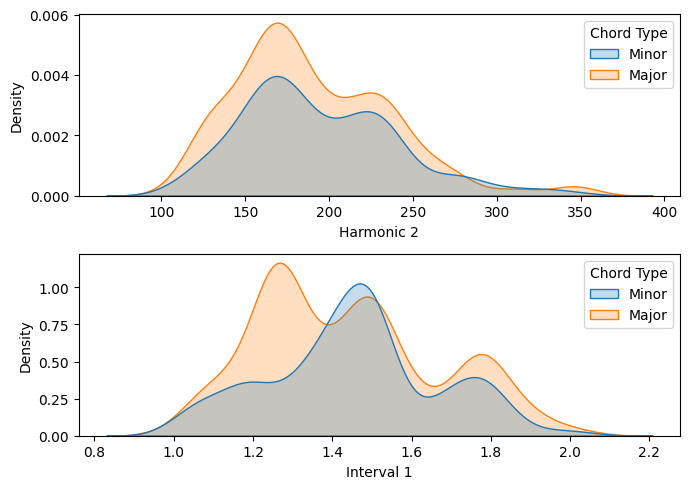

In [137]:
df["Interval 1"] = df["Harmonic 2"].div(df["Harmonic 1"], axis=0)

fig, axes = plt.subplots(2, 1, figsize=(7, 5))
sns.kdeplot(ax=axes[0], data=df, x="Harmonic 2", hue="Chord Type", fill=True)
sns.kdeplot(ax=axes[1], data=df, x="Interval 1", hue="Chord Type", fill=True)
fig.tight_layout()
plt.show()

Наконец-то у нас есть данные, которые меняются в зависимости от типа аккорда.

Есть 38 гармоник, но мы уже знаем, что для высших гармоник существует огромное количество пропущенных значений. Сделаем цикл для первых 20 интервалов. Для каждого интервала будем вычислять отношение текущей гармоники к предыдущей.

In [138]:
for i in range(1,21):
    inter_c = "Interval {}".format(i)
    harm_c = "Harmonic {}".format(i+1)
    harm_p = "Harmonic {}".format(i)
    df[inter_c] = df[harm_c].div(df[harm_p], axis=0)

df.head()

,Chord Type,File Name,Min Harmonic,Max Harmonic,i of Harmonics,Harmonic 1,Harmonic 2,Harmonic 3,Harmonic 4,Harmonic 5,...,Interval 11,Interval 12,Interval 13,Interval 14,Interval 15,Interval 16,Interval 17,Interval 18,Interval 19,Interval 20
0,Minor,Minor_104.wav,88.0,1874.0,27,88.0,131.0,175.0,209.0,262.0,...,1.009524,1.167925,1.008078,1.051282,1.065549,1.127325,1.058376,1.049161,1.070857,1.113127
1,Minor,Minor_201.wav,175.0,1053.0,13,175.0,233.0,278.0,350.0,354.0,...,1.066135,1.126203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Minor,Minor_117.wav,87.0,919.0,21,87.0,131.0,156.0,173.0,208.0,...,1.061069,1.047962,1.070938,1.119658,1.124046,1.039049,1.021242,1.049600,1.190549,1.176697
3,Minor,Minor_145.wav,98.0,877.0,12,98.0,175.0,196.0,233.0,295.0,...,1.251070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Minor,Minor_276.wav,155.0,2225.0,25,155.0,234.0,278.0,311.0,370.0,...,1.052632,1.052703,1.071887,1.123353,1.163113,1.019248,1.054856,1.063939,1.115385,1.012213


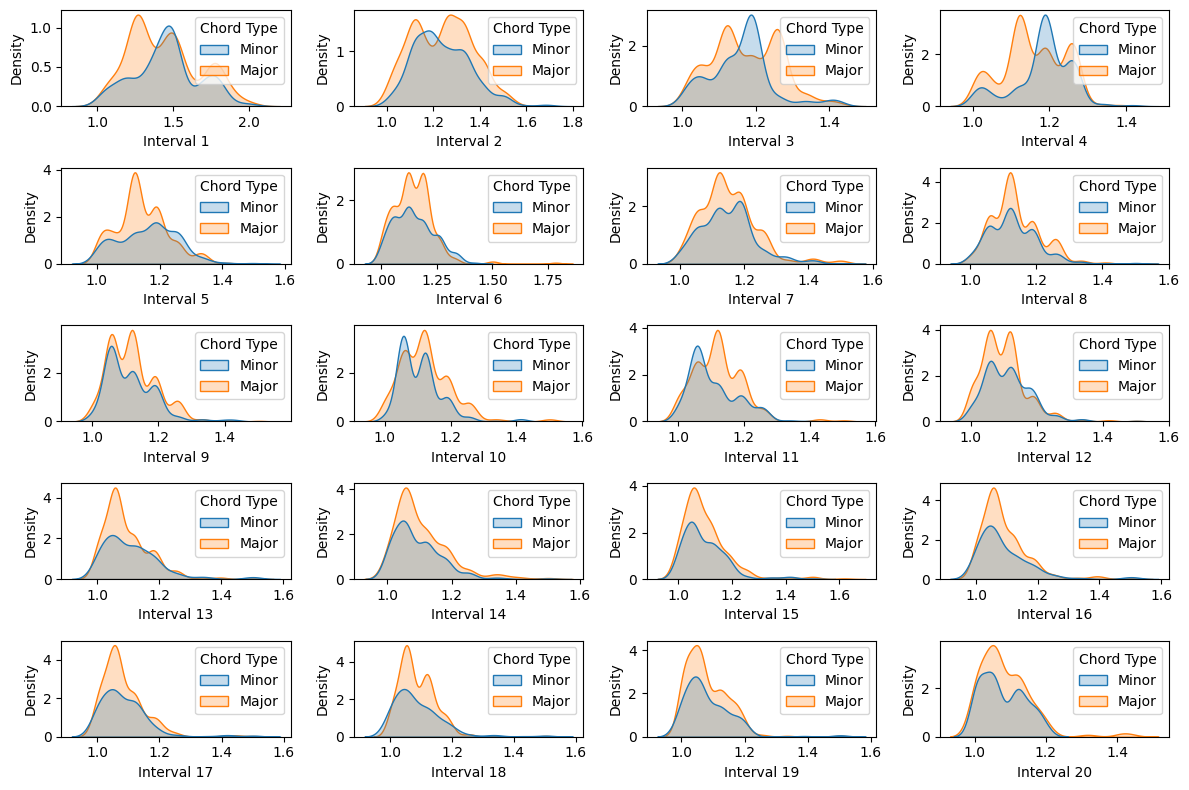

In [139]:
fig, axes = plt.subplots(5, 4, figsize=(12, 8))
for i in range(1,21):
    plt.subplot(5, 4, i)
    sns.kdeplot(data=df, x="Interval {}".format(i), hue="Chord Type", fill=True)
fig.tight_layout()
plt.show()

Interval 1, Interval 2, Interval 3, Interval 4 определенно подходят для обучения.

Interval 5, Interval 6, Interval 7 - имеют слабо-выраженную зависимость, но они все равно пригодны для использования.

После 8-го интервала, мы к сожалению теряем некоторые значения. Дальнейшие интервалы не будут использоваться.

# Построение модели

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [141]:
columns = ["Interval 1", "Interval 2", "Interval 3", "Interval 4"]
X_train, x_test, y_train, y_test = train_test_split(df[columns], df["Chord Type"], test_size=0.4, random_state=0)
dec_sc = cross_val_score(DecisionTreeClassifier(random_state=0), X_train, y_train, cv=10).mean()
for_sc = cross_val_score(RandomForestClassifier(random_state=0), X_train, y_train, cv=10).mean()
print("Decision score: " , dec_sc)
print("Forest score: ", for_sc)

Decision score:  0.8968702865761691
Forest score:  0.9084841628959277


In [142]:
classifier = RandomForestClassifier(random_state=0)

classifier.fit(train_X, train_y)
pred_y = classifier.predict(val_X)


print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_y))
print("Accuracy Score: {:.2f}".format(accuracy_score(y_test, pred_y)))

Confusion Matrix:
[[186  13]
 [ 15 130]]
Accuracy Score: 0.92


Достаточно неплохо.

# Итоги

Достаточно интересная пара: музыка и машинное обучение. В этой работе я открыл для себя новые способы обработки данных(преимущественно звуковых файлов), их преобразование и дальнейшее использование в обучении. Мною была обучена модель классификации музыкальных аккордов на интервальных характеристиках.

Конечно это все показывает, что машинное обучение - это невероятно мощный инструмент, который находит своё применение в чём угодно.